<a href="https://colab.research.google.com/github/nafi-rahman/ML-AI/blob/main/02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Classification with Pytorch
`code - https://github.com/mrdbourke/pytorch-deep-learning`

`discussion - https://github.com/mrdbourke/pytorch-deep-learning/discussions`

# things to cover -
* Architecture of a Neural Network Model
* Input and output shapes of a classification model (features and labels)
* creating custom data to view, fit, predict
* steps in modelling - (creating, optimizing, training loop etc)
* saving and loading the model
* non linearity
* different classification evaluation models

#typical architecture of a NN model
* input shape - it's typically the same as the number of features
* hidden layers - problem specific with a minimum number of `1`
* neurons per hidden layer - problem specific but generally `10 - 512`
* output layer shape - depends on the number of classes
* hidden layer activation - usually ReLU but can be others
* output layer activation - Usually sigmoid or softmax
* loss function - binarycross entropy or crossentropy
* optimizer - SGD or Adam

#making a classification data and getting it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

In [ ]:
#make 1000 smaples
n_samples = 1000
#create circles
x , y = make_circles(n_samples,
                     noise= 0.03,
                     random_state =42)
len(x),len(y)

(1000, 1000)

In [ ]:
#looking at the first 5 instancse of the dataset
print(f"frist 5 samples of x: {x[:5]}")
print(f"frist 5 samples of y: {y[:5]}")

frist 5 samples of x: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
frist 5 samples of y: [1 1 1 1 0]


In [ ]:
#making a dataframe of pandas
import pandas as pd
circles = pd.DataFrame({"X1":x[:,0],
                        "X2": x[:,1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


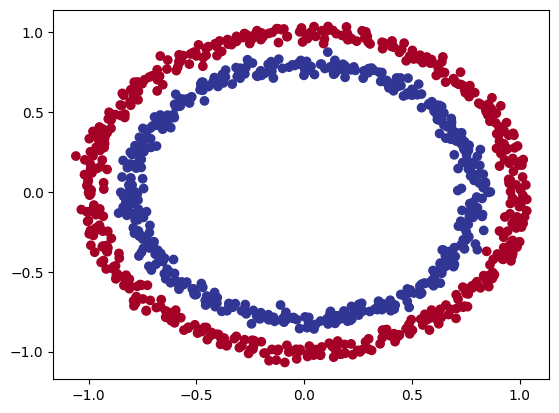

In [ ]:
#visualize
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

###1.1 check input and output shapes

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# view the first example of features and labels
x_sample = x[0]
y_sample = y[0]
print(f"values for one sample of x: {x_sample} \n y: {y_sample}")
print(f"shape values for one sample of x: {x_sample.shape} \n y: {y_sample.shape}")

values for one sample of x: [0.75424625 0.23148074] 
 y: 1
shape values for one sample of x: (2,) 
 y: ()


###1.2 Turning data into tensors and create train/test splits

In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
#turn data into tesnsors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
#split train test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42
                                                    )
len(x_train),len(x_test),len(y_train),len(y_test)

(800, 200, 800, 200)

##2. Building a model
building a model to classify the red and blue dots.
in order to do that we need to:
* set device agnostic code,
* construct a model by subclassing nn.Module
* define loss func and optimizer
* creating a train and test loop

In [ ]:
#import pytorch and nn
import torch
from torch import nn

#make code device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#construct a model with 2 linear layers
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=5) #takes 2 features and upscales to 5 features
    self.layer2 = nn.Linear(in_features=5, out_features=1) #takes 5 features and outputs 1

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.layer2(self.layer1(x)) # x -> layer 1 -> layer 2 -> output

model = CircleModelV1().to(device)
model, next(model.parameters()).device

(CircleModelV1(
   (layer1): Linear(in_features=2, out_features=5, bias=True)
   (layer2): Linear(in_features=5, out_features=1, bias=True)
 ),
 device(type='cpu'))

In [ ]:
#construct a model with sequential layer

model = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model, next(model.parameters()).device

(Sequential(
   (0): Linear(in_features=2, out_features=5, bias=True)
   (1): Linear(in_features=5, out_features=1, bias=True)
 ),
 device(type='cpu'))

In [ ]:
#making preds with model
with torch.inference_mode():

  untrain_pred = model(x_test.to(device))

  print(f"len of pred: {len(untrain_pred)}\n shpae: {untrain_pred.shape}")
  print(f"len of test sample: {len(x_test)}\n shpae: {x_test.shape}")
  print(f"first 10 pred: {untrain_pred[:10]}")
  print(f"first 10 label: {y_test[:10]}")


len of pred: 200
 shpae: torch.Size([200, 1])
len of test sample: 200
 shpae: torch.Size([200, 2])
first 10 pred: tensor([[-0.0267],
        [-0.0349],
        [ 0.0057],
        [-0.0359],
        [ 0.0228],
        [ 0.0177],
        [-0.0191],
        [-0.0068],
        [ 0.0050],
        [-0.0353]])
first 10 label: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


###2.1 setting up loss func and optimizer



In [ ]:
loss_fn = nn.BCEWithLogitsLoss() #BCEwithLogitLoss has sigmoid activation function built-in
loss_fn_2 = nn.BCELoss() #BCELoss requires inputs to go through sigmoid function prior to this

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [11]:
#calculate accuracy - out of 100 examples what percentage did the model get right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Training / Testing
* forward pass
* calc loss
* optimizer zero grad
* loss backwards
* optimizer step

###3.1 Going raw logits -> pred probability -> pred labels

the model output will be a raw **LOGIT**
we can convert the logits into probabilities by passing them through an activation function

In [ ]:
#view the first 5 outputs of the forwad pass on the test data
model.eval()
with torch.inference_mode():
  y_logits = model(x_test.to(device))[:5]
y_logits

tensor([[-0.0267],
        [-0.0349],
        [ 0.0057],
        [-0.0359],
        [ 0.0228]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
#using sigmoid on the logits
y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.4933],
        [0.4913],
        [0.5014],
        [0.4910],
        [0.5057]])

In [ ]:
#find the predicted labels
y_preds = torch.round(y_pred_prob)
y_pred_labels = torch.round(torch.sigmoid(model(x_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

### 3.2 building training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
  #train
  model.train()

  #forward pass
  y_logits = model(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate loss / accuracy

  loss = loss_fn(y_logits, y_train) #nn.bcewithlogitsloss
  acc = accuracy_fn(y_true=y_train, #custom accuracy func
                    y_pred = y_pred)

  #optimizer
  optimizer.zero_grad()
  loss.backward() #backpropagation
  optimizer.step() #step step step

  #testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #calculate test loss / acc
    test_loss = loss_fn(test_logits,y_test)
    test_accuracy = accuracy_fn(y_true=y_test, #custom accuracy func
                    y_pred = test_pred)
    #print
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | loss: {loss:.5f} | Acc: {acc:.2f}| test loss: {test_loss:.5f} | test accuracy: {test_accuracy:.2f}")

Epoch: 0 | loss: 0.69338 | Acc: 49.00| test loss: 0.69255 | test accuracy: 51.00
Epoch: 10 | loss: 0.69330 | Acc: 48.62| test loss: 0.69277 | test accuracy: 50.00
Epoch: 20 | loss: 0.69324 | Acc: 48.50| test loss: 0.69295 | test accuracy: 50.00
Epoch: 30 | loss: 0.69319 | Acc: 48.62| test loss: 0.69312 | test accuracy: 46.50
Epoch: 40 | loss: 0.69315 | Acc: 49.75| test loss: 0.69327 | test accuracy: 43.00
Epoch: 50 | loss: 0.69312 | Acc: 48.38| test loss: 0.69341 | test accuracy: 51.00
Epoch: 60 | loss: 0.69310 | Acc: 48.75| test loss: 0.69353 | test accuracy: 50.50
Epoch: 70 | loss: 0.69308 | Acc: 49.25| test loss: 0.69364 | test accuracy: 48.50
Epoch: 80 | loss: 0.69307 | Acc: 49.00| test loss: 0.69374 | test accuracy: 49.00
Epoch: 90 | loss: 0.69305 | Acc: 49.62| test loss: 0.69383 | test accuracy: 49.50
Epoch: 100 | loss: 0.69304 | Acc: 50.25| test loss: 0.69391 | test accuracy: 48.00
Epoch: 110 | loss: 0.69304 | Acc: 50.00| test loss: 0.69398 | test accuracy: 48.50
Epoch: 120 | lo

## 4. Make predictions and evaluate the mode

From the metrics, it looks like the model is not learning anything. to inspect it we need to make predictions and visualize them

In [21]:
import requests
from pathlib import Path

#download helper func from learn pytorch repo(if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper function exists, skipping")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

from helper_function import plot_predictions, plot_decision_boundary

NameError: ignored

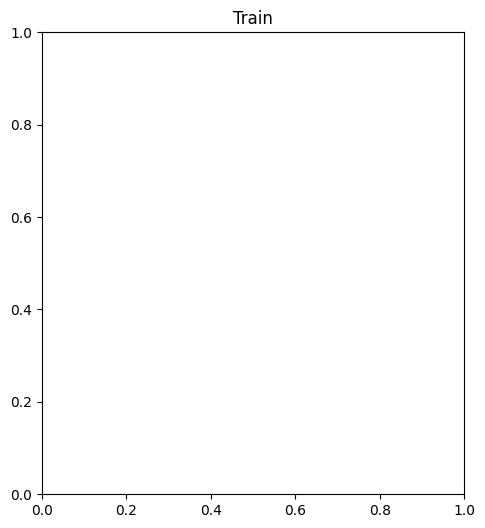

In [22]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model,x_test,y_test)

##improving the model (from the model perspective)
`these things apply changes to the model to improve the performance not data`
* Adding more layers - give the model more chances to learn the patterns in the data.
* adding more hidden layer (going from 5 to 10 hidden units for this example)
* fit for longer (more epochs)
* changing the activation functions
* changing the learning rate
* changing the loss func


In [ ]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1760,  0.0454],
                      [-0.2226,  0.0863],
                      [ 0.4685,  0.5920],
                      [ 0.3755,  0.5070],
                      [-0.0294,  0.3361]])),
             ('0.bias', tensor([ 0.3262, -0.3796, -0.1060, -0.4823, -0.6294])),
             ('1.weight',
              tensor([[-0.0119, -0.1853, -0.2982,  0.3480,  0.2043]])),
             ('1.bias', tensor([0.1992]))])

###New model

In [ ]:
from torch import nn
new_model = nn.Sequential(
    nn.Linear(in_features=2, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=256),
    nn.ReLU(),
    nn.Linear(in_features=256, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=1),
)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss() #BCEwithLogitLoss has sigmoid activation function built-in
loss_fn_2 = nn.BCELoss() #BCELoss requires inputs to go through sigmoid function prior to this

optimizer = torch.optim.SGD(new_model.parameters(), lr=0.1)

In [ ]:
new_model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230],
                      [ 0.1900, -0.1918],
                      [ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
        

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 350
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
  #train
  new_model.train()

  #forward pass
  y_logits = new_model(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate loss / accuracy

  loss = loss_fn(y_logits, y_train) #nn.bcewithlogitsloss
  acc = accuracy_fn(y_true=y_train, #custom accuracy func
                    y_pred = y_pred)

  #optimizer
  optimizer.zero_grad()
  loss.backward() #backpropagation
  optimizer.step() #step step step

  #testing
  new_model.eval()
  with torch.inference_mode():
    test_logits = new_model(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #calculate test loss / acc
    test_loss = loss_fn(test_logits,y_test)
    test_accuracy = accuracy_fn(y_true=y_test, #custom accuracy func
                    y_pred = test_pred)
    #print
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | loss: {loss:.5f} | Acc: {acc:.2f}| test loss: {test_loss:.5f} | test accuracy: {test_accuracy:.2f}")

Epoch: 0 | loss: 0.69146 | Acc: 59.38| test loss: 0.69227 | test accuracy: 55.00
Epoch: 10 | loss: 0.69002 | Acc: 64.75| test loss: 0.69121 | test accuracy: 65.00
Epoch: 20 | loss: 0.68866 | Acc: 67.25| test loss: 0.69017 | test accuracy: 67.00
Epoch: 30 | loss: 0.68736 | Acc: 65.62| test loss: 0.68914 | test accuracy: 62.50
Epoch: 40 | loss: 0.68604 | Acc: 65.62| test loss: 0.68810 | test accuracy: 61.00
Epoch: 50 | loss: 0.68469 | Acc: 66.00| test loss: 0.68702 | test accuracy: 61.00
Epoch: 60 | loss: 0.68320 | Acc: 67.38| test loss: 0.68583 | test accuracy: 62.50
Epoch: 70 | loss: 0.68149 | Acc: 69.38| test loss: 0.68444 | test accuracy: 65.00
Epoch: 80 | loss: 0.67960 | Acc: 72.88| test loss: 0.68286 | test accuracy: 69.00
Epoch: 90 | loss: 0.67747 | Acc: 74.88| test loss: 0.68110 | test accuracy: 72.00
Epoch: 100 | loss: 0.67516 | Acc: 77.00| test loss: 0.67915 | test accuracy: 71.50
Epoch: 110 | loss: 0.67256 | Acc: 78.12| test loss: 0.67693 | test accuracy: 73.50
Epoch: 120 | lo

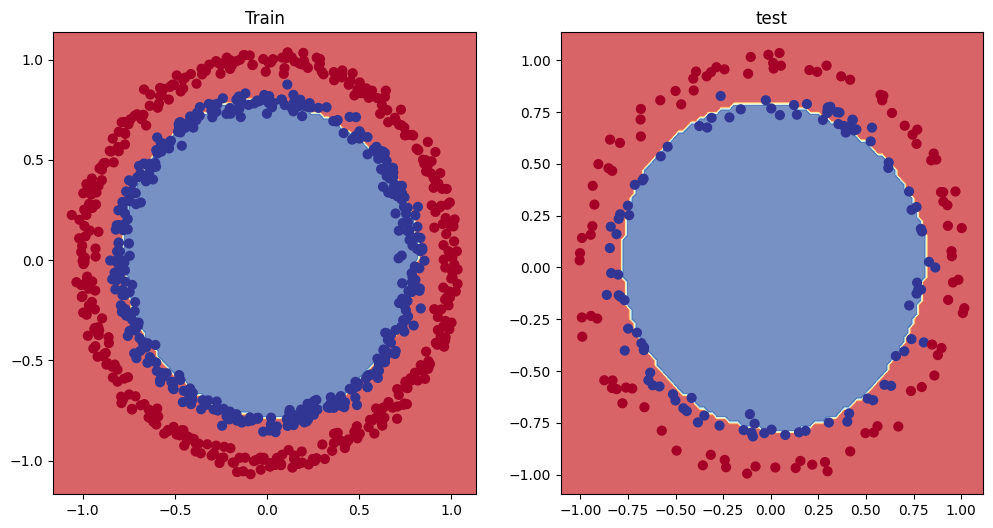

In [ ]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(new_model,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(new_model,x_test,y_test)

###continuation of tutorial

In [ ]:
class Circle_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)

    # return z

    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = Circle_model().to(device)
model_1

Circle_model(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01)

In [ ]:
 epochs = 1000

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train, y_pred= y_pred)
  optimizer.zero_grad
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_test, test_pred)
    #print
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | loss: {loss:.5f} | Acc: {acc:.2f}| test loss: {test_loss:.5f} | test accuracy: {test_acc:.2f}")

Epoch: 0 | loss: 0.69396 | Acc: 50.88| test loss: 0.69430 | test accuracy: 50.00
Epoch: 10 | loss: 0.69363 | Acc: 51.62| test loss: 0.69705 | test accuracy: 49.50
Epoch: 20 | loss: 0.69770 | Acc: 50.00| test loss: 0.69547 | test accuracy: 43.00
Epoch: 30 | loss: 0.70300 | Acc: 50.00| test loss: 0.70202 | test accuracy: 50.00
Epoch: 40 | loss: 0.69973 | Acc: 48.00| test loss: 0.70962 | test accuracy: 43.00
Epoch: 50 | loss: 0.69710 | Acc: 50.00| test loss: 0.69307 | test accuracy: 49.00
Epoch: 60 | loss: 0.81252 | Acc: 50.00| test loss: 0.81586 | test accuracy: 50.00
Epoch: 70 | loss: 0.69580 | Acc: 51.12| test loss: 0.69558 | test accuracy: 50.00
Epoch: 80 | loss: 0.71677 | Acc: 50.00| test loss: 0.74507 | test accuracy: 50.00
Epoch: 90 | loss: 0.76470 | Acc: 50.00| test loss: 0.75119 | test accuracy: 50.00
Epoch: 100 | loss: 0.97611 | Acc: 50.00| test loss: 1.01181 | test accuracy: 50.00
Epoch: 110 | loss: 1.02582 | Acc: 49.50| test loss: 1.09991 | test accuracy: 54.50
Epoch: 120 | lo

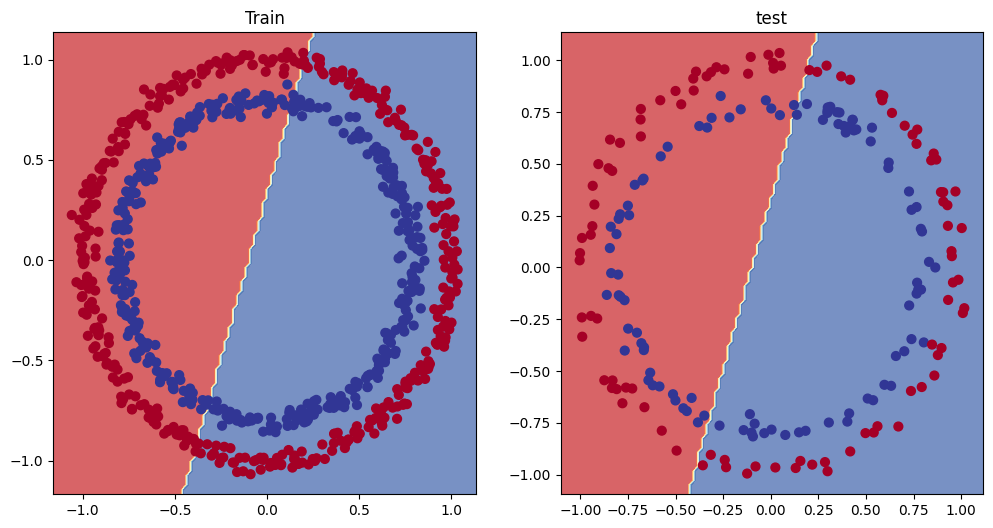

In [ ]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,x_test,y_test)

###5.1 Prepare data to see if the model is capable of learning
one way to troubleshoot problems in ML is to see if it works on a smaller problem

In [ ]:
#create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#create data
x_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * x_regression + bias

#check the data
print(len(x_regression))
x_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
#create train and test split

train_split = int(0.8 * len(x_regression))
x_train_reg, y_train_reg = x_regression[:train_split], y_regression[:train_split]
x_test_reg, y_test_reg = x_regression[train_split:], y_regression[train_split:]

len(x_train_reg), len(y_train_reg), len(x_test_reg), len(y_test_reg)

(80, 80, 20, 20)

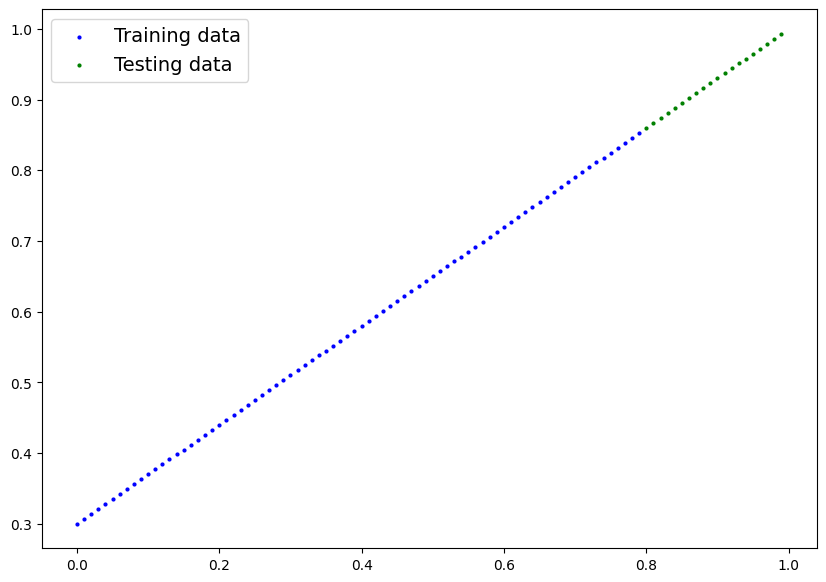

In [ ]:
plot_predictions(train_data=x_train_reg,
                 train_labels=y_train_reg,
                 test_data=x_test_reg,
                 test_labels=y_test_reg)

###5.2 Adjusting `model_1` to fit straight line

In [ ]:
#model to fit linear data
model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [ ]:
#train model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set epoch
epochs = 1000

#put the data on the target device
x_train_reg, y_train_reg = x_train_reg.to(device), y_train_reg.to(device)
x_test_reg, y_test_reg = x_test_reg.to(device), y_test_reg.to(device)

for epoch in range(epochs):
  model_2.train()
  y_pred_reg = model_2(x_train_reg)
  loss = loss_fn(y_pred_reg, y_train_reg)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_pred_reg = model_2(x_test_reg)
    test_loss = loss_fn(test_pred_reg,y_test_reg)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5789582133293152 | Test Loss: 0.8227251768112183
Epoch: 100 | Loss: 0.03496142849326134 | Test Loss: 0.001556271337904036
Epoch: 200 | Loss: 0.03267959877848625 | Test Loss: 0.0033015250228345394
Epoch: 300 | Loss: 0.02942253090441227 | Test Loss: 0.004460394382476807
Epoch: 400 | Loss: 0.027310658246278763 | Test Loss: 0.0056967050768435
Epoch: 500 | Loss: 0.026715081185102463 | Test Loss: 0.005340182688087225
Epoch: 600 | Loss: 0.026268724352121353 | Test Loss: 0.00510598998516798
Epoch: 700 | Loss: 0.025940800085663795 | Test Loss: 0.004957902245223522
Epoch: 800 | Loss: 0.024818608537316322 | Test Loss: 0.003935986664146185
Epoch: 900 | Loss: 0.023327991366386414 | Test Loss: 0.004619506187736988


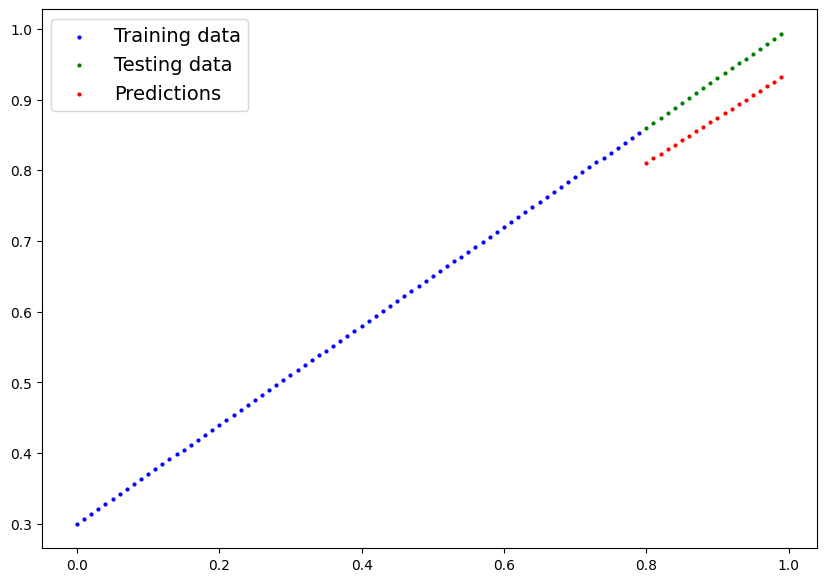

In [ ]:
model_2.eval()
with torch.inference_mode():
  predictions = model_2(x_test_reg)
plot_predictions(train_data=x_train_reg,
                 train_labels=y_train_reg,
                 test_data=x_test_reg,
                 test_labels=y_test_reg,
                 predictions= predictions)

###6.1 Recreating non-linear data (Red and Blue cirlces)

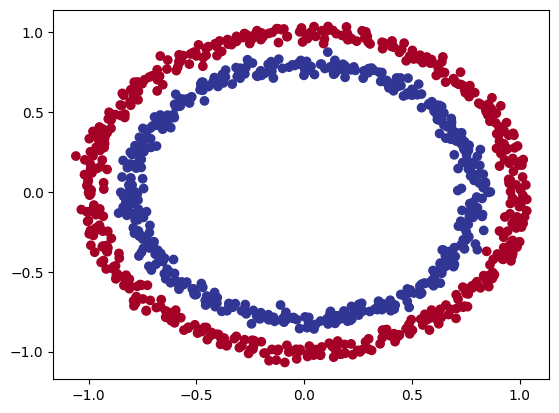

In [ ]:
#make and plot the data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

x , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

plt.scatter(x[:,0] , x[:,1] , c=y, cmap= plt.cm.RdYlBu)

In [ ]:
#convert data to tensors and then to train/test splits
import torch
from sklearn.model_selection import train_test_split

#turn data into tensors

x= torch.from_numpy(x).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

#split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.2,
                                                    random_state=42)

###6.2 Building a model with non-linearity

In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU()
  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)


In [ ]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [ ]:
#loss fn and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### 6.3 Training the model with non liniarity


In [ ]:
#random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#putting data in target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

epochs = 2000

for epoch in range(epochs):
  model_3.train()

  #forward pass
  y_logits = model_3(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_train,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #test
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test,test_pred)

    #print
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} |Loss: {loss:.4f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.4f}  |  Test Accuracy: {test_acc:.2f}%")


Epoch: 0 |Loss: 0.6929 | Accuracy: 50.00% | Test Loss: 0.6932  |  Test Accuracy: 50.00%
Epoch: 100 |Loss: 0.6912 | Accuracy: 52.88% | Test Loss: 0.6910  |  Test Accuracy: 52.50%
Epoch: 200 |Loss: 0.6898 | Accuracy: 53.37% | Test Loss: 0.6894  |  Test Accuracy: 55.00%
Epoch: 300 |Loss: 0.6879 | Accuracy: 53.00% | Test Loss: 0.6872  |  Test Accuracy: 56.00%
Epoch: 400 |Loss: 0.6852 | Accuracy: 52.75% | Test Loss: 0.6841  |  Test Accuracy: 56.50%
Epoch: 500 |Loss: 0.6810 | Accuracy: 52.75% | Test Loss: 0.6794  |  Test Accuracy: 56.50%
Epoch: 600 |Loss: 0.6751 | Accuracy: 54.50% | Test Loss: 0.6729  |  Test Accuracy: 56.00%
Epoch: 700 |Loss: 0.6666 | Accuracy: 58.38% | Test Loss: 0.6632  |  Test Accuracy: 59.00%
Epoch: 800 |Loss: 0.6516 | Accuracy: 64.00% | Test Loss: 0.6476  |  Test Accuracy: 67.50%
Epoch: 900 |Loss: 0.6236 | Accuracy: 74.00% | Test Loss: 0.6215  |  Test Accuracy: 79.00%
Epoch: 1000 |Loss: 0.5682 | Accuracy: 87.75% | Test Loss: 0.5738  |  Test Accuracy: 86.50%
Epoch: 1100

###6.4 evaluating the model trained with non-linear activation functions

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model_3(x_test))).squeeze()



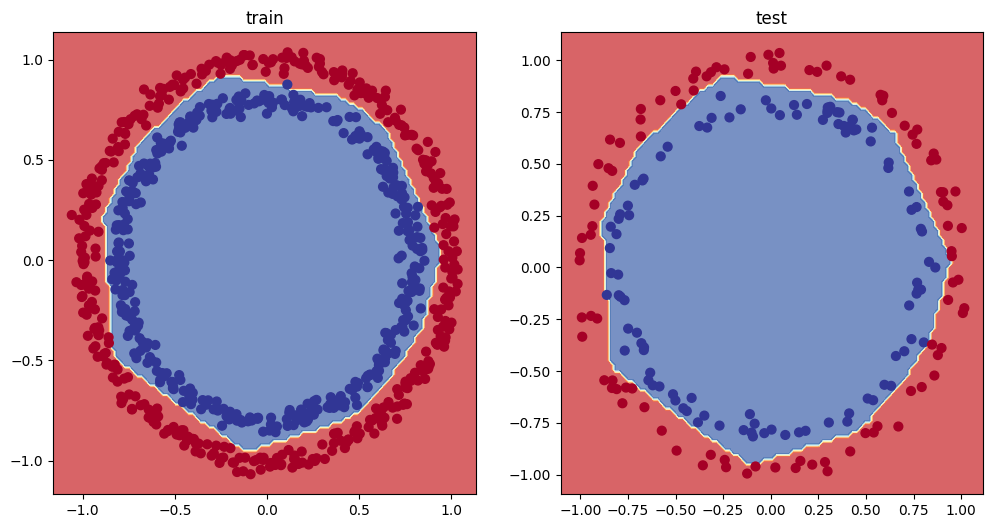

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,x_test,y_test)


##7. replicating non-linear activation functions

RELU

In [ ]:
#Create a tensor
A = torch.arange(-10,10,1,dtype=torch.float32)


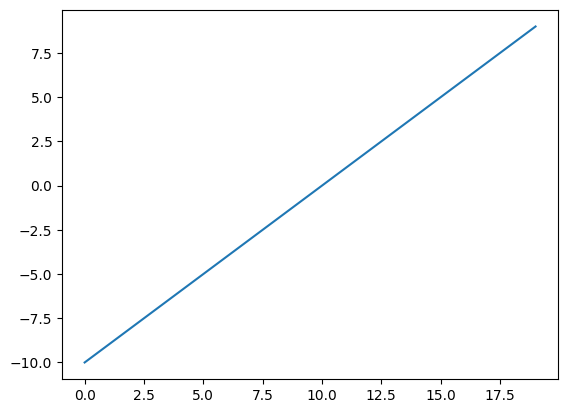

In [ ]:
#visualize the data
plt.plot(A)

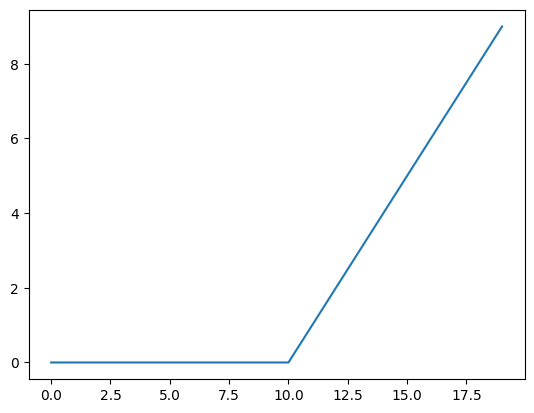

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0),x)

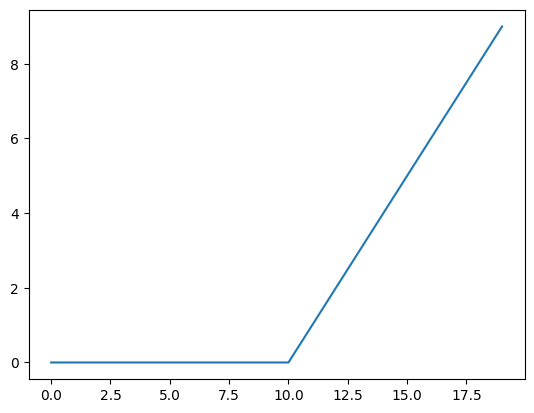

In [ ]:
plt.plot(relu(A))

Sigmoid

In [ ]:
def sigmoid(x):
  return 1 / (1+torch.exp(-x))

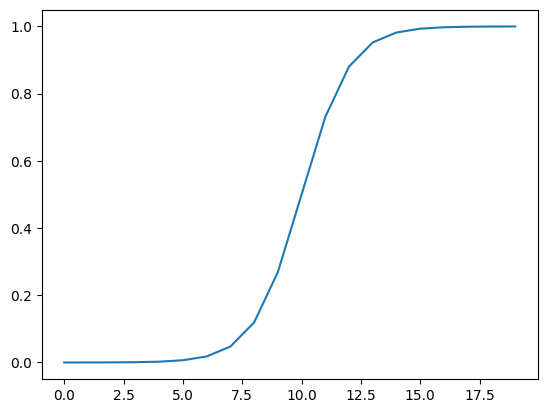

In [ ]:
plt.plot(sigmoid(A))

##8. putting it together with a multi-class classification problem

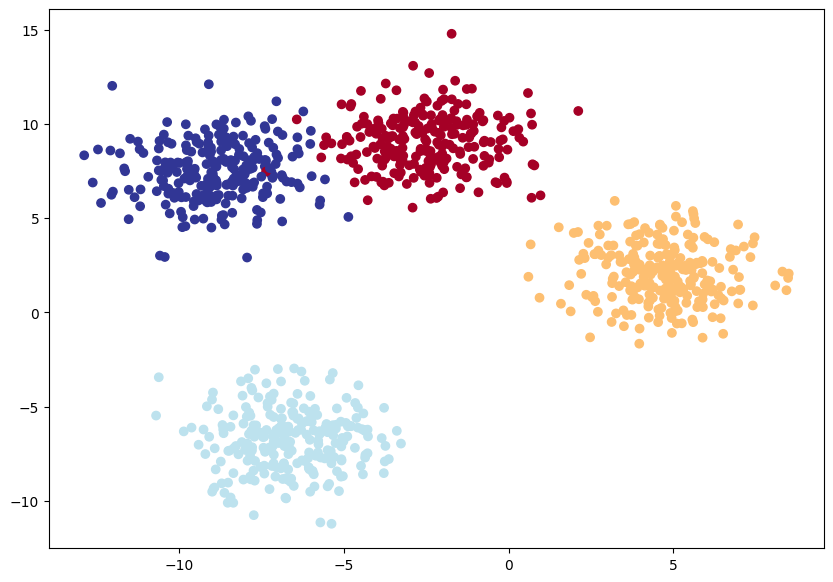

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set the hyper params
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#create multiclass data
x_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

#turn data into tensors

x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

#split into train/test

x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

#visualize

plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],
            x_blob[:,1],
            c=y_blob,
            cmap=plt.cm.RdYlBu)

In [2]:
len(x_blob_train),len(x_blob_test),len(y_blob_train),len(y_blob_test)

(800, 200, 800, 200)

### 8.2 Building a multi-class classification model with pytorch

In [3]:
#creating device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
#building a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """
    Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model.
      output_features (int): Number of output features to the model.
      hidden_units (int): Number of hidden unit between layers.

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

#create an instance of blob model
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

###8.3 Create a loss function and optimizer for a multiclass classification model

In [5]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                             lr=0.1)


###8.4 getting predtiction probabilities for our multiclass pytorch model

in order to evaluate and train the model we need to convert our model's prediction probabilities to prediction labels

In [6]:
#raw outputs of the model are called logits
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(x_blob_test.to(device))

In [7]:
#convert logit output to prediction probobilities

y_pred_probs = torch.softmax(y_logits,dim=1)

#convert prediction probabilities to prediction labels
y_pred= torch.argmax(y_pred_probs,dim=1)

In [8]:
print(f"raw output: {y_logits[:10]}\n")
print(f"prediction probability: {y_pred_probs[:10]}\n")
print(f"prediction labels: {y_pred[:10]}\n")

raw output: tensor([[ 0.6455, -0.0781,  0.4526,  0.0769],
        [ 0.0304,  0.3468,  0.2028,  0.2705],
        [-0.6178, -0.2798,  0.5073,  0.0417],
        [ 0.4883, -0.2308,  0.3194,  0.0080],
        [ 0.9770,  0.0901,  0.5248,  0.0541],
        [-0.0480,  0.5161,  0.2488,  0.3580],
        [-0.4731, -0.2842,  0.3897,  0.0100],
        [ 0.7934,  0.0284,  0.3928,  0.0615],
        [-0.9171, -0.1661,  0.7416,  0.0515],
        [ 0.8569,  0.0411,  0.4473,  0.0390]])

prediction probability: tensor([[0.3477, 0.1686, 0.2867, 0.1969],
        [0.2070, 0.2840, 0.2459, 0.2631],
        [0.1348, 0.1891, 0.4154, 0.2608],
        [0.3389, 0.1651, 0.2863, 0.2097],
        [0.4089, 0.1684, 0.2602, 0.1625],
        [0.1784, 0.3137, 0.2401, 0.2678],
        [0.1613, 0.1949, 0.3823, 0.2615],
        [0.3822, 0.1779, 0.2561, 0.1838],
        [0.0909, 0.1925, 0.4772, 0.2393],
        [0.3925, 0.1736, 0.2606, 0.1732]])

prediction labels: tensor([0, 1, 2, 0, 0, 1, 2, 0, 2, 0])



### 8.5 train/test loop

In [13]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

x_blob_train,x_blob_test = x_blob_train.to(device), x_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device).type(torch.long), y_blob_test.to(device).type(torch.long)

for epoch in range(epochs):
  #train
  model_4.train()
  y_logits = model_4(x_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_blob_train,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #test
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(x_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_blob_test,test_pred)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.1437 | Accuracy: 73.12% | Test Loss: 0.9978 | Test Accuracy: 79.00%
Epoch: 10 | Loss: 0.4221 | Accuracy: 94.88% | Test Loss: 0.3340 | Test Accuracy: 98.50%
Epoch: 20 | Loss: 0.1370 | Accuracy: 99.25% | Test Loss: 0.1124 | Test Accuracy: 99.50%
Epoch: 30 | Loss: 0.0767 | Accuracy: 99.25% | Test Loss: 0.0631 | Test Accuracy: 99.50%
Epoch: 40 | Loss: 0.0555 | Accuracy: 99.25% | Test Loss: 0.0443 | Test Accuracy: 99.50%
Epoch: 50 | Loss: 0.0457 | Accuracy: 99.25% | Test Loss: 0.0355 | Test Accuracy: 99.50%
Epoch: 60 | Loss: 0.0402 | Accuracy: 99.25% | Test Loss: 0.0305 | Test Accuracy: 99.50%
Epoch: 70 | Loss: 0.0367 | Accuracy: 99.25% | Test Loss: 0.0271 | Test Accuracy: 99.50%
Epoch: 80 | Loss: 0.0342 | Accuracy: 99.25% | Test Loss: 0.0247 | Test Accuracy: 99.50%
Epoch: 90 | Loss: 0.0324 | Accuracy: 99.25% | Test Loss: 0.0229 | Test Accuracy: 99.50%


### 8.6 Making and evaluating perdictions with a pytorch multi-class model

In [14]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(x_blob_test)

#view the first 10 predictions
y_logits[:10]

tensor([[ 1.8781,  8.3171, -1.5880, -4.0043],
        [ 3.0668, -3.3956, -1.7159,  7.9307],
        [-4.2987, -1.9130,  6.6660, -0.6653],
        [ 0.4744,  5.1937, -0.8512, -2.7250],
        [ 9.0577,  3.9959, -3.0067, -0.2927],
        [ 3.3038, -4.1902, -1.8362,  9.6490],
        [-3.5475, -1.5990,  5.5867, -0.6930],
        [ 8.4581,  1.4123, -2.7808,  1.2807],
        [-5.3980, -2.7020,  8.5705, -0.3405],
        [ 8.8156,  2.0796, -2.6931,  0.5781]])

In [16]:
#logits to prediction probabilities
y_pred_probs =torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[1.5954e-03, 9.9835e-01, 4.9841e-05, 4.4483e-06],
        [7.6609e-03, 1.1958e-05, 6.4148e-05, 9.9226e-01],
        [1.7288e-05, 1.8785e-04, 9.9914e-01, 6.5421e-04],
        [8.8181e-03, 9.8848e-01, 2.3425e-03, 3.5965e-04],
        [9.9361e-01, 6.2940e-03, 5.7245e-06, 8.6378e-05],
        [1.7521e-03, 9.7484e-07, 1.0263e-05, 9.9824e-01],
        [1.0761e-04, 7.5522e-04, 9.9727e-01, 1.8688e-03],
        [9.9835e-01, 8.6965e-04, 1.3130e-05, 7.6240e-04],
        [8.5797e-07, 1.2716e-05, 9.9985e-01, 1.3487e-04],
        [9.9854e-01, 1.1856e-03, 1.0028e-05, 2.6416e-04]])

In [19]:
#from pred_probs to pred_labels

y_pred = torch.argmax(y_pred_probs, dim=1)
y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

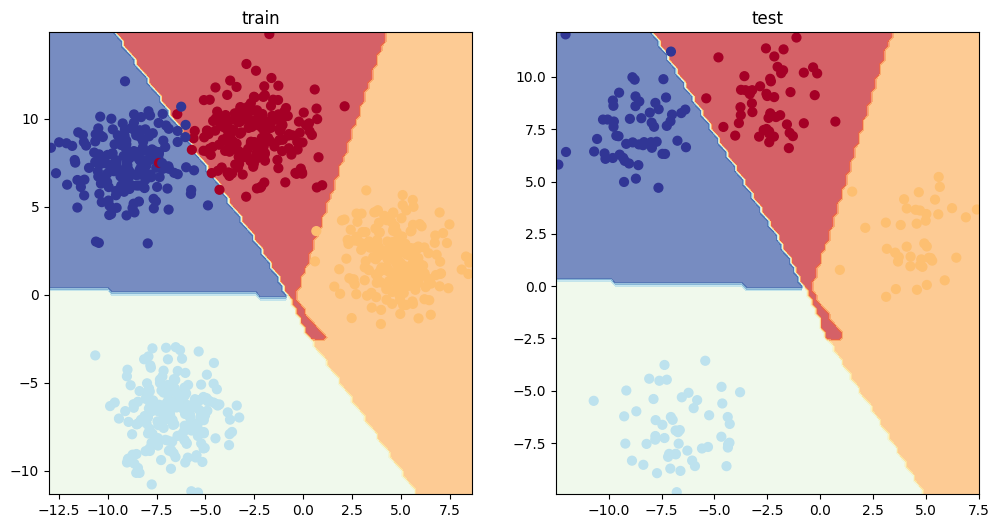

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4,x_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4,x_blob_test,y_blob_test)


## 9. A few more classification metrics

Evaluating a model is as important as training a model

* Accuracy - out of a 100 samples how many can the model get right
* Precision -
* Recall -
* F1 score -
* Confusion Matrix -
* Classification Model -

In [27]:
import torchmetrics
from torchmetrics import Accuracy

In [30]:
#setup metric

accuracy = Accuracy(task="multiclass", num_classes=4)
#calculate accuracy of model
accuracy(y_pred,y_blob_test)

tensor(0.9950)